# Titanic Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

## Importing and analysis

In [2]:
df = pd.read_csv('./datasets/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can already tell that there are some missing values, so we'll have to deal with them later

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

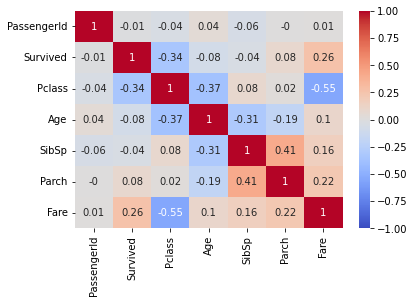

In [5]:
sns.heatmap(df.corr().round(2),
                annot=True, center=0, vmin=-1, vmax=1,
                cmap = "coolwarm")

I'm curious to see the **Cabin** field and how it behaves, because there are too many NaN's

In [7]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [6]:
print(len(df['Cabin'].unique()))
print(len(np.where(df['Cabin'].value_counts() == 1)[0]))

148
101


## Lidando com NaNs

To fill the NaN's in the columns **Age**, I'll use the median strategy to avoid getting float values for the age.

A point of improvement here could be looking at the passenger title or their cabin. Using the title we can estimate a certain age gap and the cabin may duggest passenger that were together, allowing idification of siblings or families. 

In [8]:
imputer = SimpleImputer(strategy='median')
df['Age'] = imputer.fit_transform(df[['Age']])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


For the columns **Cabin** and **Embarked**, I will just drop them. Embarked refers to where the passenger boarded, which I'll assume has little bearing on whether the passenger survived for the sake of simplicity. Cabin, on the other hand, is a bit trickier. The Cabin column not only has mostly NaN values but also the non-NaN data is almost unique. Most of the available values occur only once or twice, the most common value is repeated only 4 times.

In [9]:
df = df.drop(columns=['Cabin', 'Embarked'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500


## Finding a Baseline

For the titanic dataset, a great way to find a baseline is to simply say that all women will survive and all men will die.

In [10]:
y_pred = np.where(df['Sex'] == 'male', 0, 1)

In [11]:
print('f1 = ', f1_score(df['Survived'], y_pred))
print(classification_report(df['Survived'], y_pred))

f1 =  0.7103658536585367
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       549
           1       0.74      0.68      0.71       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.77       891
weighted avg       0.78      0.79      0.78       891



With the established baseline, we may start preparing the new model.

## Decision Tree

Before creating the models, we must define the X and y that will ve used for train and testing.

In [12]:
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = df['Survived']

I'll also take this moment to parse the categorical feature.

In [13]:
encoder = OrdinalEncoder()
X['Sex'] = encoder.fit_transform(X[['Sex']])

C:\Users\henri\anaconda3\envs\santander\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.7)

### "Raw" mode

In [15]:
model = DecisionTreeClassifier(random_state=42)
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [16]:
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [17]:
y_pred = model.predict(X_test)

In [18]:
print('f1 = ', f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

f1 =  0.6948356807511736
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       157
           1       0.73      0.67      0.69       111

    accuracy                           0.76       268
   macro avg       0.75      0.74      0.75       268
weighted avg       0.76      0.76      0.76       268



The Raw model is worse than our baseline 😬. Let's try to find something better using Cross Validation

### CV Model
Let's explore the best combinations of `max_depth` and `min_samples_leaf`

In [19]:
espaco_hiperparametros = {
    'max_depth' : np.arange(1, len(X.columns)),
    'min_samples_leaf' : list(range(1,10))
}

In [20]:
model = DecisionTreeClassifier()
rand_search = RandomizedSearchCV(model, espaco_hiperparametros, n_iter=45, cv=5)
search = rand_search.fit(X_train, y_train)
rand_search.best_params_

{'min_samples_leaf': 4, 'max_depth': 5}

In [21]:
y_pred = search.predict(X_test)

In [22]:
print('f1 = ', f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

f1 =  0.7632850241545894
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       157
           1       0.82      0.71      0.76       111

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.81       268



With RandomSearchCV we were able to find one of the best combination of ours hiperparameters inside the given combination space.<br/>
Using ``{'min_samples_leaf': 4, 'max_depth': 5}`` we get a 0.76 F1-Score, which is 0.05 better than our baseline, it isn't huge, but still considerable.

## Exploring Pipeline
This is me taking a shot on using pipelines

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [25]:
# Reloading the dataset
df = pd.read_csv('./datasets/train.csv')

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Survived']), df['Survived'], random_state=42, train_size=0.7)

In [27]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
445,446,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S
650,651,3,"Mitkoff, Mr. Mito",male,NaN,0,0,349221,7.8958,NaN,S
172,173,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S
450,451,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,NaN,S
314,315,2,"Hart, Mr. Benjamin",male,43.0,1,1,F.C.C. 13529,26.2500,NaN,S


In [28]:
model = DecisionTreeClassifier(min_samples_leaf=4,max_depth=5)

# Separating nueric and categorical features
numeric_feat = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
cat_feat = ['Sex']

# Creating a pipe for each
numeric_pipe = SimpleImputer(strategy = 'median') # I'll fill numeric NaN's with the median
cat_pipe = OrdinalEncoder()

# Creating the preprocessing pipe
column_processing = ColumnTransformer([
    ('num', numeric_pipe, numeric_feat),
    ('cat', cat_pipe, cat_feat)
])

pipe = Pipeline([
    ('processing', column_processing),
    ('model', model)
])

In [29]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('cat', OrdinalEncoder(),
                                                  ['Sex'])])),
                ('model',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=4))])

In [30]:
y_pred = pipe.predict(X_test)
print('f1 = ', f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

f1 =  0.7632850241545894
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       157
           1       0.82      0.71      0.76       111

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.81       268



<h1>It worked!! </h1>
<iframe src="https://giphy.com/embed/iGZbJAPP21aRO7aU7P" width="480" height="480" frameBorder="0" class="giphy-embed" allowFullScreen></iframe>